In [26]:
import pandas as pan
import numpy as np
import matplotlib.pyplot as plotter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
matrix_data = pan.read_csv("mushrooms.csv")

In [3]:
#as most of the data is categorical, there will be a shit-ton of one hot encoding going on
matrix_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


<Axes: xlabel='class', ylabel='count'>

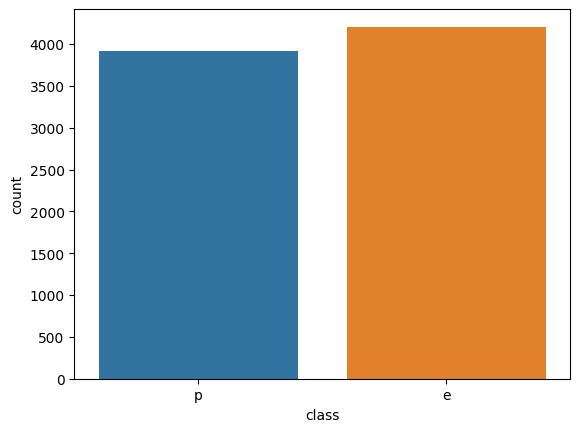

In [4]:
sns.countplot(x = matrix_data["class"])

In [10]:
unique_features = matrix_data.describe().transpose().reset_index().sort_values(by = "unique")

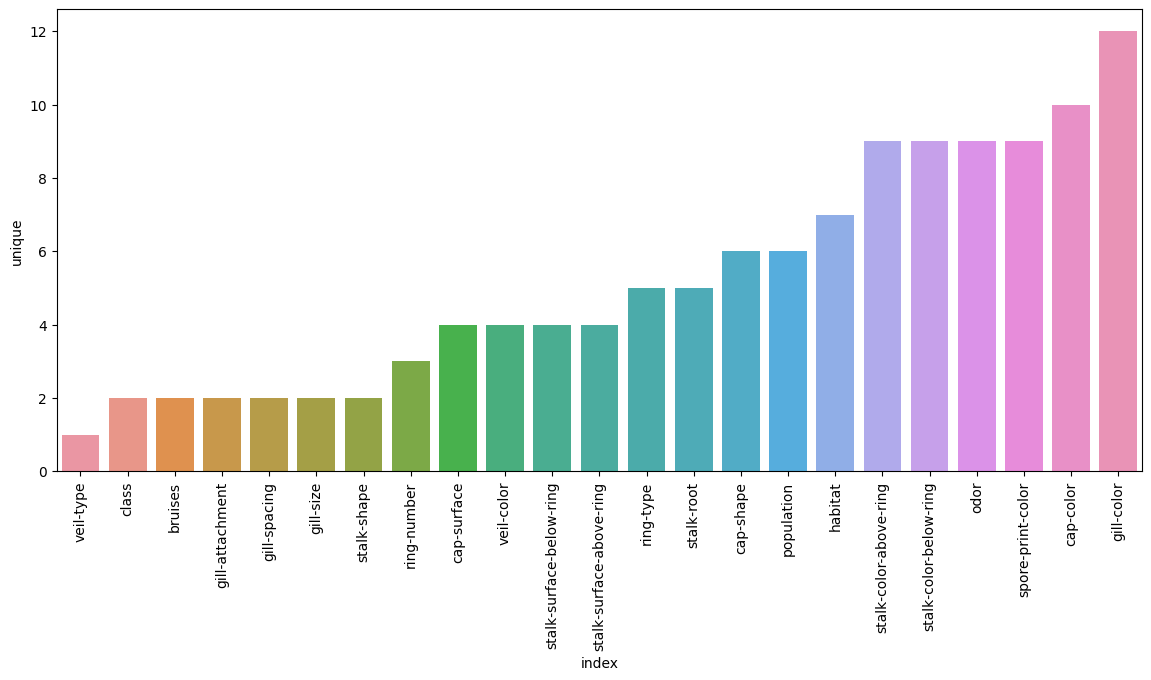

In [14]:
plotter.figure(figsize = (14, 6))
sns.barplot(x = unique_features["index"], y = unique_features["unique"])
plotter.xticks(rotation = 90);

In [18]:
features = pan.get_dummies(matrix_data.drop("class", axis = 1), drop_first = True)
label = matrix_data["class"]

In [22]:
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size = 0.15, random_state = 42)

In [24]:
prim_ada_boosted_learner = AdaBoostClassifier(n_estimators = 1)

In [25]:
prim_ada_boosted_learner.fit(feature_train, label_train)

AdaBoostClassifier(n_estimators=1)

              precision    recall  f1-score   support

           e       0.97      0.80      0.88       637
           p       0.82      0.97      0.89       582

    accuracy                           0.88      1219
   macro avg       0.89      0.89      0.88      1219
weighted avg       0.90      0.88      0.88      1219



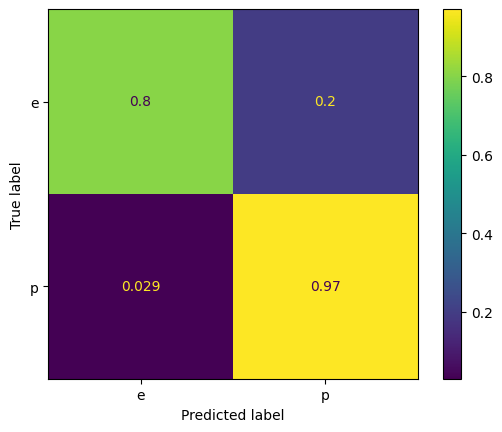

In [27]:
print(classification_report(label_test, prim_ada_boosted_learner.predict(feature_test)))
ConfusionMatrixDisplay.from_predictions(label_test, prim_ada_boosted_learner.predict(feature_test), normalize= "true")

In [30]:
prim_ada_boosted_learner.feature_importances_.argmax()
features.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

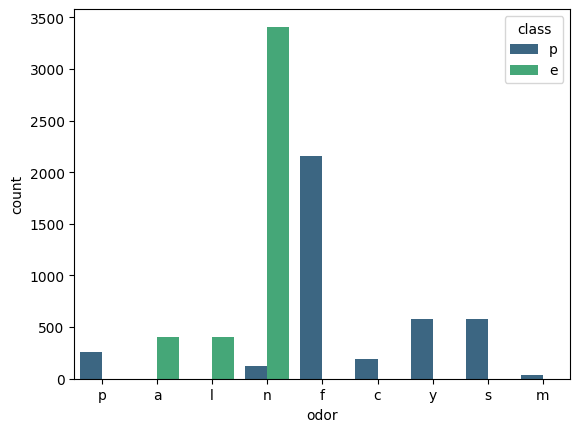

In [33]:
#investigating
sns.countplot(x = matrix_data["odor"], hue = matrix_data["class"], palette = "viridis")